In [3]:
# Import needed library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
!pip install openpyxl xarray

In [6]:
# Load dataset

car_df = pd.read_excel("data/CarPrice_data.xlsx", engine='openpyxl') #xlrd - supports only .xls format

In [80]:
# !pip install seaborn
# [c[0] for c in car_df.dtypes if c[1] in ['int', 'double']]
# .to_dict('list') | ('dict', list, 'series', 'split', 'records', 'index')
# [c for c in car_df.dtypes.to_dict().keys() if 'int' in car_df.dtypes.to_dict().values()]#.to_frame().reset_index().iloc[:,1].to_list()
# car_df.select_dtypes([float,int]).columns
# car_df.dtypes.value_counts()#float64,int64,object
len(car_df.select_dtypes([int,float,object]).columns) #'O'|object,'float64'|float,'int64'|int,'int64','float64','O'

26

In [8]:
# car_df.head()
car_df.set_index('car_ID')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [62]:
len(car_df.CarName.unique())

147

In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
car_df.shape

(205, 26)

### Data Cleaning

In [81]:
# extract the company name from the car name

# len(car_df.CarName.unique())

# 'dodge coronet custom'.split(' ')[0]
print('CompanyName' in car_df.columns)
car_df['CompanyName'] = car_df.CarName.apply(lambda x: x.split(' ')[0])
print('CompanyName' in car_df.columns)
car_df.head()

False
True


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [43]:
'CarName' in car_df.columns

False

In [82]:
# help(car_df.insert)
car_df.insert(
    2,
    "CN",
    car_df.CarName.apply(lambda x: x.split(' ')[0])
    )
len(car_df.CN.unique())

# drop the unneeded features
print(len(car_df.columns))
# car_df.drop(['CN', 'CarName'], axis=1, inplace=True)
car_df = car_df.drop(['CN', 'CarName'], axis=1)
print(len(car_df.columns))

28
26


In [49]:
# help(car_df.drop)
car_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [83]:
# Clean and standardize the company name

car_df.CompanyName = car_df.CompanyName.str.lower() # converts the company names to lower case

car_df.CompanyName = car_df.CompanyName \
    .replace('vokswagen','volkswagen') \
        .replace('vw','volkswagen') \
            .replace('maxda','mazda') \
                .replace('toyouta','toyota') \
                    .replace('porcshce','porsche')

car_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [58]:
type(car_df.CompanyName) #pandas.core.series.Series

type(car_df[['car_ID','symboling']]) #pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [68]:
car_df[car_df.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName


## Visualization

In [74]:
help(plt.subplot)

Help on function subplot in module matplotlib.pyplot:

subplot(*args, **kwargs)
    Add an Axes to the current figure or retrieve an existing Axes.
    
    This is a wrapper of `.Figure.add_subplot` which provides additional
    behavior when working with the implicit API (see the notes section).
    
    Call signatures::
    
       subplot(nrows, ncols, index, **kwargs)
       subplot(pos, **kwargs)
       subplot(**kwargs)
       subplot(ax)
    
    Parameters
    ----------
    *args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
        The position of the subplot described by one of
    
        - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
          *index* position on a grid with *nrows* rows and *ncols* columns.
          *index* starts at 1 in the upper left corner and increases to the
          right. *index* can also be a two-tuple specifying the (*first*,
          *last*) indices (1-based, and including *last*) of the subplo

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


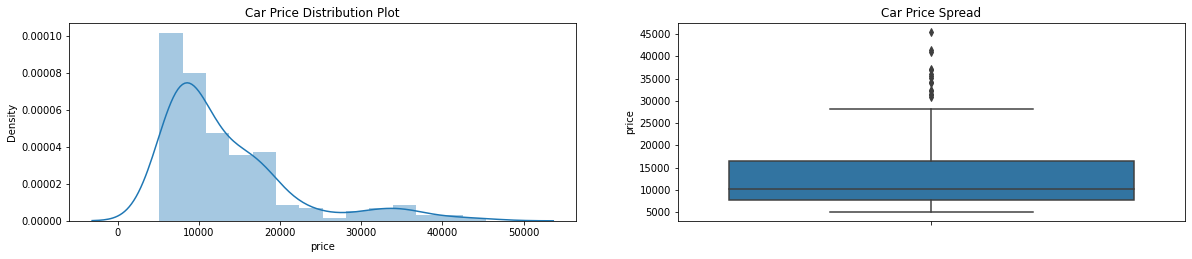

In [88]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(car_df.price)


plt.subplot(2,2,2)

# plt.subplot(2,1,1)

# plt.subplot(2,1,2)
plt.title('Car Price Spread')
sns.boxplot(y=car_df.price)
# plt.hist(car_df.price, bins=100)

plt.show()

In [90]:
help(np.quantile)

Help on function quantile in module numpy:

quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)
    Compute the q-th quantile of the data along the specified axis.
    
    .. versionadded:: 1.15.0
    
    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    q : array_like of float
        Quantile or sequence of quantiles to compute, which must be between
        0 and 1 inclusive.
    axis : {int, tuple of int, None}, optional
        Axis or axes along which the quantiles are computed. The
        default is to compute the quantile(s) along a flattened
        version of the array.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output,
        but the type (of the output) will be cast if necessary.
    overwrite_input : bool, optional
        If True, then allow t

In [94]:
import numpy as np

print(np.quantile(car_df.price, [0.25,0.5,0.75,0.85,0.9,1]))

car_df.price.describe(percentiles=[0.25,0.5,0.75,0.85,0.9,1])

[ 7788. 10295. 16503. 18500. 22563. 45400.]


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

<AxesSubplot:>

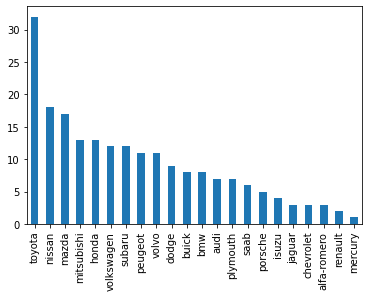

In [121]:
# [c for c in car_df.columns if str in list(type(car_df[c][0]))]
# car_df.columns
# car_df['car_ID'][0]
# type(car_df['car_ID'][0])

car_df.CompanyName.value_counts().plot(kind='bar')

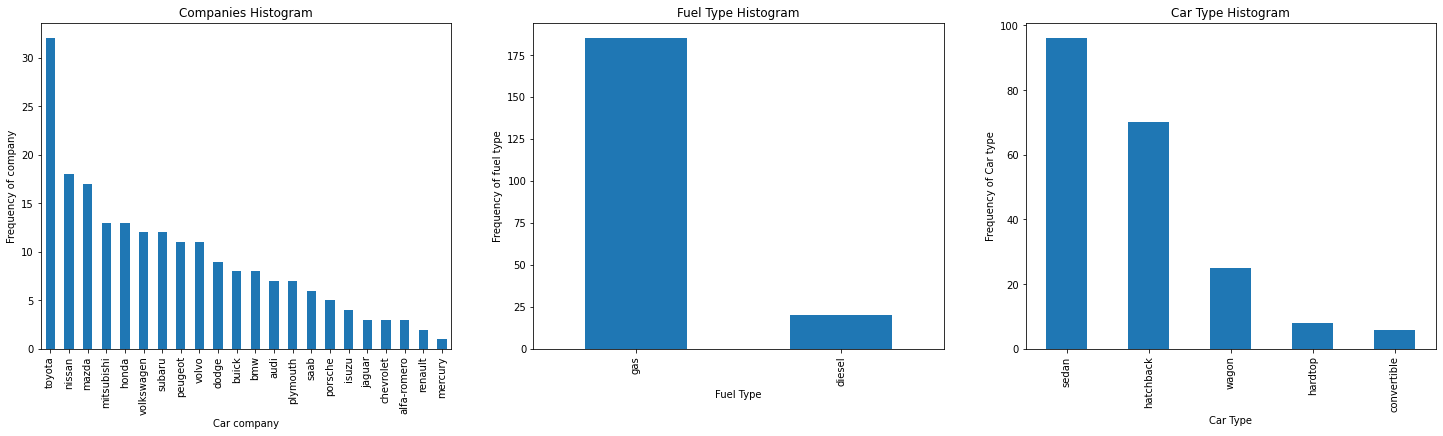

In [122]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = car_df.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = car_df.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = car_df.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


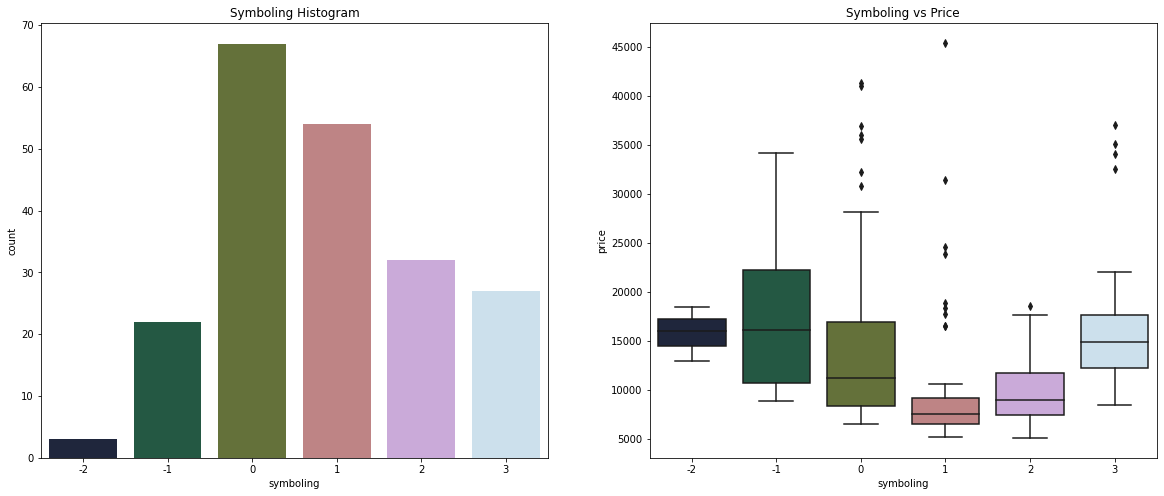

In [125]:
plt.figure(figsize=(20,8))
cars = car_df
plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


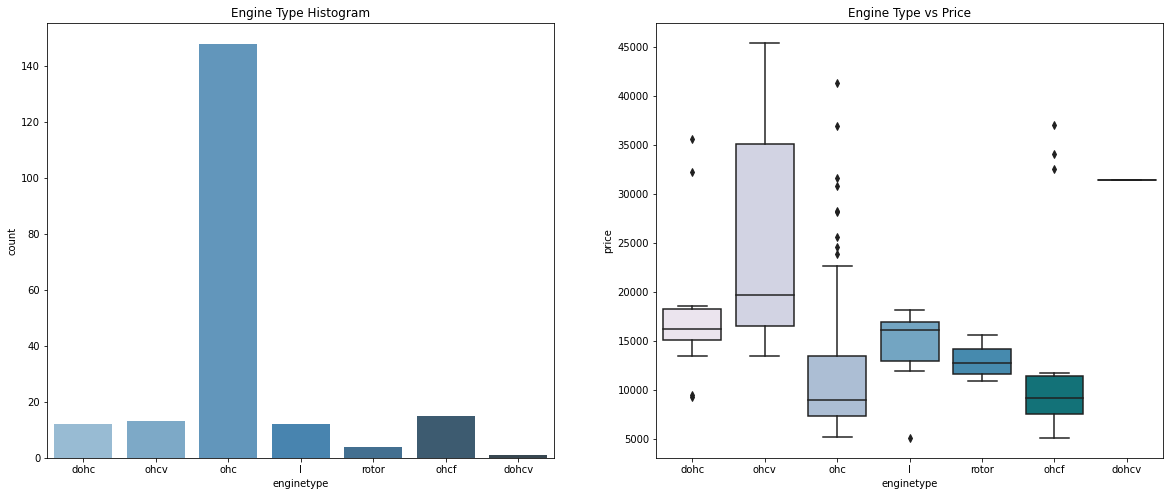

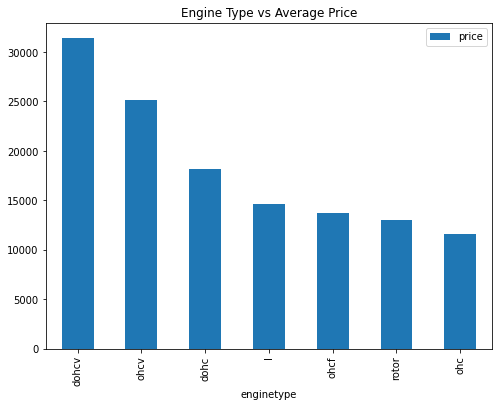

In [129]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [136]:
pd.crosstab(cars.enginetype,cars.symboling)

symboling,-2,-1,0,1,2,3
enginetype,,,,,,
dohc,0,2,2,2,1,5
dohcv,0,0,0,1,0,0
l,0,0,11,0,1,0
ohc,3,18,40,48,27,12
ohcf,0,0,9,0,3,3
ohcv,0,2,5,3,0,3
rotor,0,0,0,0,0,4


<Figure size 1800x432 with 0 Axes>

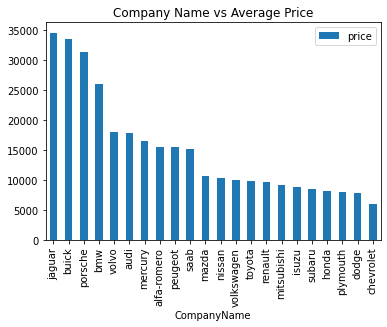

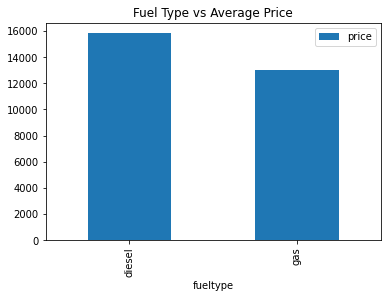

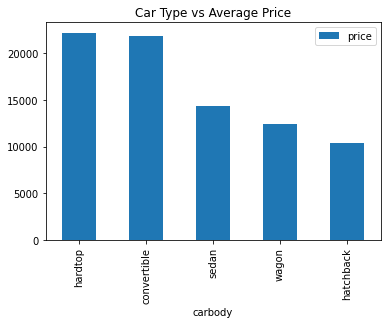

In [138]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
# df.plot.bar()
df.plot(kind='bar')
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()


c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


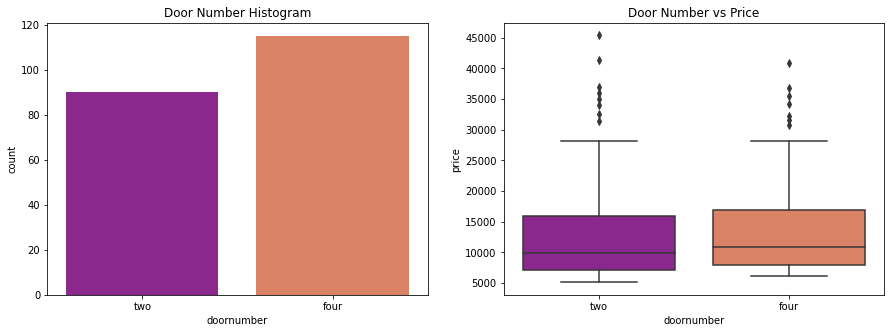

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


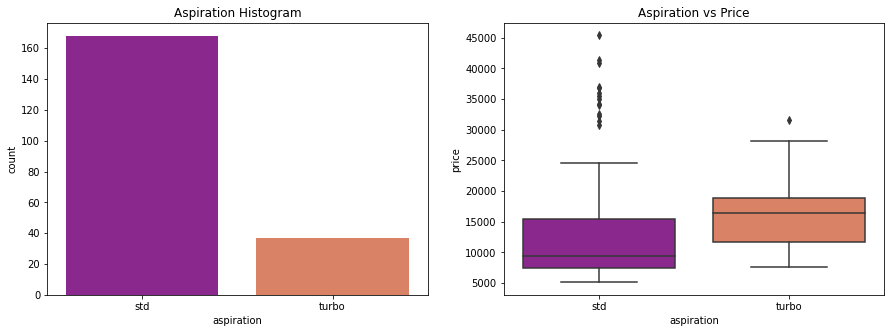

In [139]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other argume

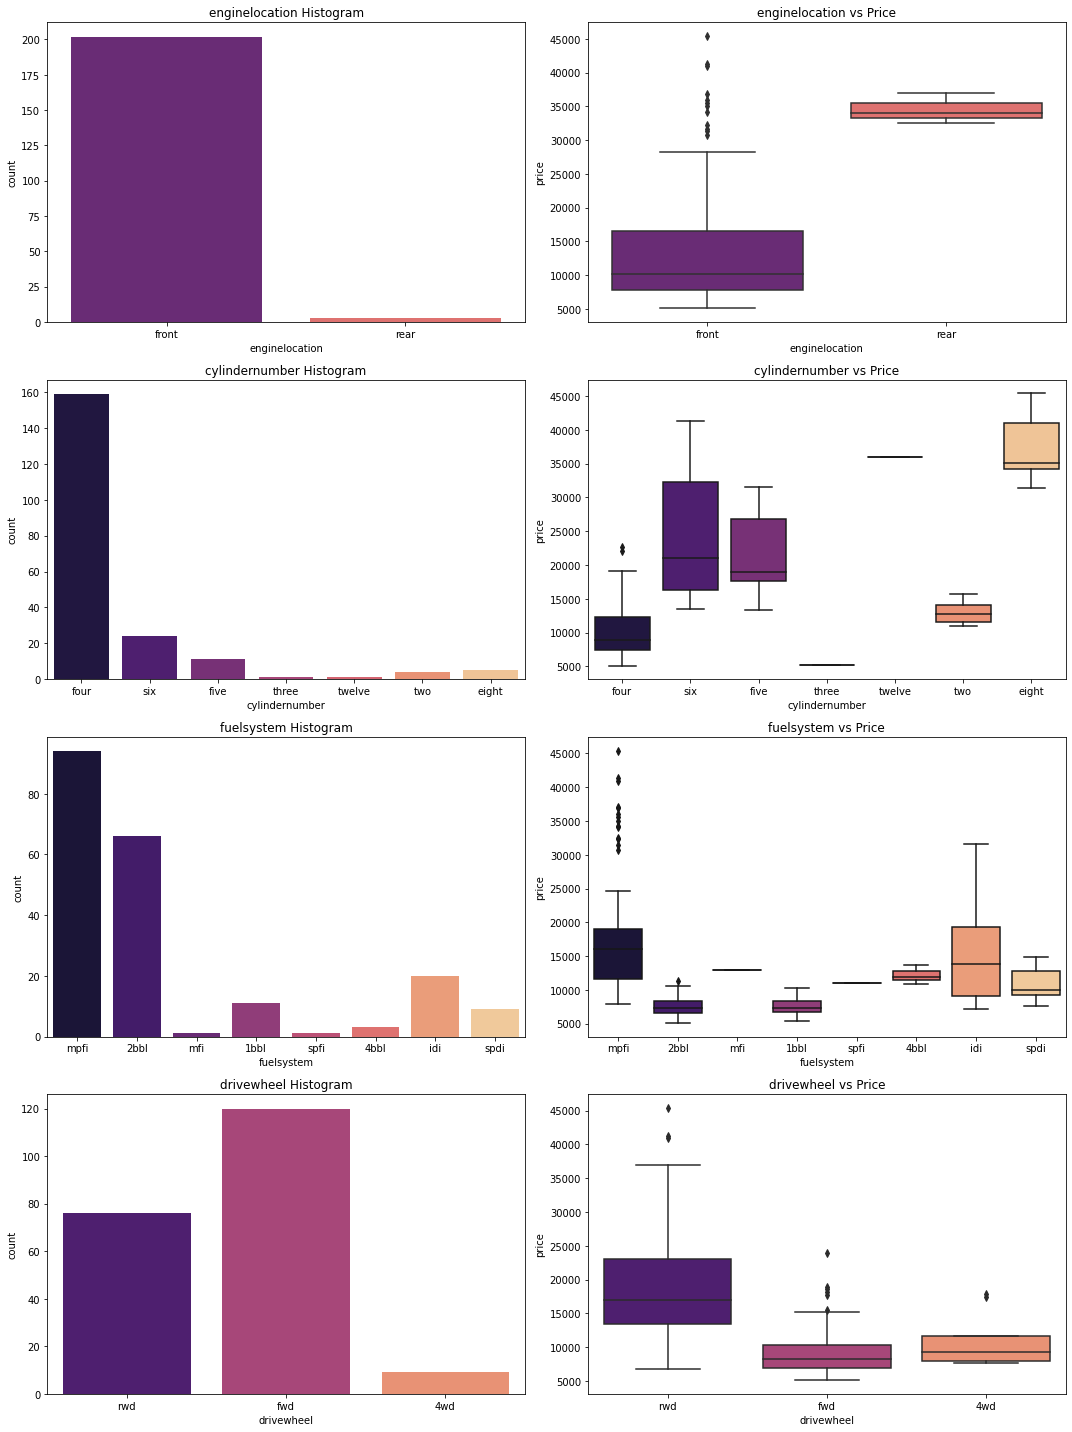

In [140]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

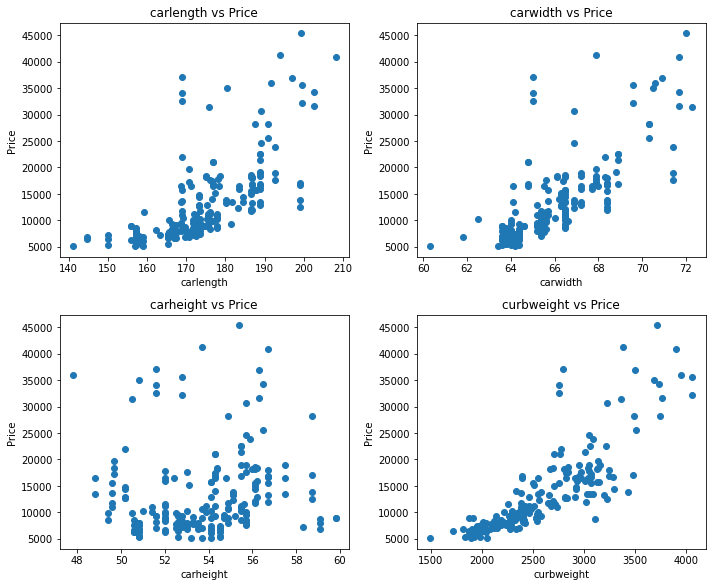

In [142]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


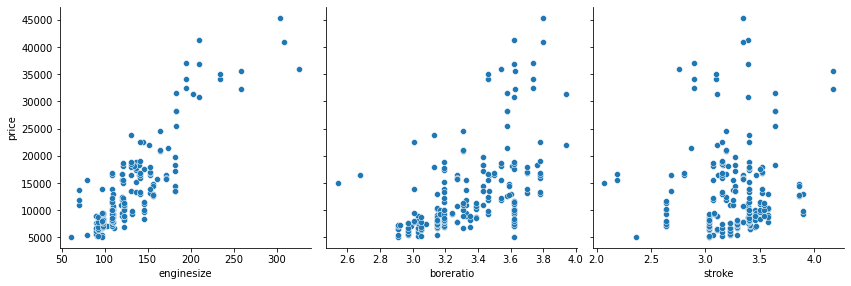

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


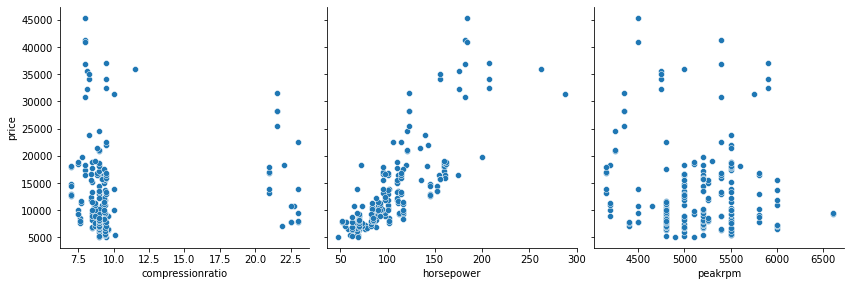

c:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\12102021\env\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


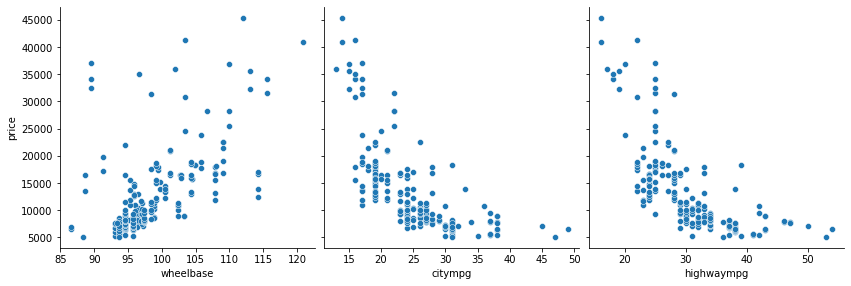

In [143]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

<AxesSubplot:>

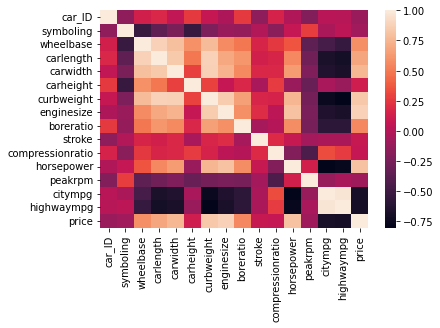

In [147]:
cor = cars.corr()

sns.heatmap(cor)

In [152]:
np.corrcoef(cars.price,cars.carlength)[0,1]

0.6829200156779621

### Feature Engineering

In [87]:
# Fuel Economy feature - (0.55*citympg)+(0.45*highwaympg)

car_df['fueleconomy'] = (0.55 * car_df['citympg']) + (0.45 * car_df['highwaympg'])

<AxesSubplot:ylabel='Frequency'>

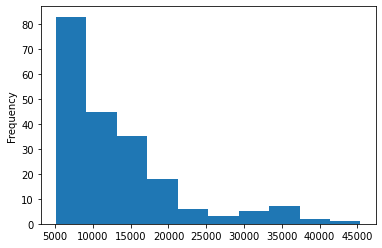

In [154]:
car_df.price.plot(kind='hist')

In [88]:
#Binning the Car Companies based on avg prices of each Company.

car_df['price'] = car_df['price'].astype('int')

temp = car_df.copy()
temp

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,audi,26.70
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,audi,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845,volvo,25.25
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045,volvo,21.70
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485,volvo,20.25
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470,volvo,26.45


In [89]:
table = temp.groupby(['CompanyName'])['price'].mean()
table

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [161]:
# type(table)
table.reset_index()

,CompanyName,price
0,alfa-romero,15498.333333
1,audi,17859.142857
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.250000
8,jaguar,34600.000000
9,mazda,10652.882353


In [90]:
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
temp

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,CompanyName,fueleconomy,price_y
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,15498.333333
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,15498.333333
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,15498.333333
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,17859.142857
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,17859.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845,volvo,25.25,18063.181818
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045,volvo,21.70,18063.181818
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485,volvo,20.25,18063.181818
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470,volvo,26.45,18063.181818


In [163]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise', ordered: bool = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
    

In [92]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
car_df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,fueleconomy,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


In [93]:
table.reset_index().tail()

,CompanyName,price
17,saab,15223.333333
18,subaru,8541.250000
19,toyota,9885.812500
20,volkswagen,10077.500000
21,volvo,18063.181818


## Feature Selection
List of significant variables after Visual analysis :
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [97]:
sel_cols = ['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']

car_df_lr = car_df[sel_cols]

# car_df_lr = car_df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
#                   'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
#                     'fueleconomy', 'carlength','carwidth', 'carsrange']]
car_df_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [117]:
# continuous and categorical features
cat_cols = list(car_df_lr.select_dtypes([object,'category']).columns)
cont_cols = list(car_df_lr.select_dtypes([float,int]).columns)
# len(cat_cols+cont_cols)
# car_df_lr.dtypes.value_counts()
# object      6
# float64     5
# int64       3
# int32       1
# category    1
# dtype: int64

## Test-Train Split and Feature Scaling

In [96]:
!pip install sklearn statsmodels

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached statsmodels-0.13.1-cp39-none-win_amd64.whl (9.4 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.0.0-py3-none-any.whl (14 kB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [131]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0) #to preserve the result over multiple iteration

df_train, df_test = train_test_split(car_df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [120]:
df_test.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
160,7738,gas,std,sedan,fwd,95.7,2094,ohc,four,98,3.19,70,42.05,166.3,64.4,Budget
186,8495,gas,std,sedan,fwd,97.3,2275,ohc,four,109,3.19,85,30.15,171.7,65.5,Medium
59,8845,gas,std,hatchback,fwd,98.8,2385,ohc,four,122,3.39,84,28.70,177.8,66.5,Medium
165,9298,gas,std,sedan,rwd,94.5,2265,dohc,four,98,3.24,112,27.35,168.7,64.0,Budget
140,7603,gas,std,hatchback,4wd,93.3,2240,ohcf,four,108,3.62,73,28.25,157.3,63.8,Budget


In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

df_train[cont_cols] = scaler.fit_transform(df_train[cont_cols])

In [122]:
df_train.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
122,0.068818,gas,std,sedan,fwd,0.244828,0.272692,ohc,four,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,Budget
125,0.466890,gas,std,hatchback,rwd,0.272414,0.500388,ohc,four,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,Highend
166,0.122110,gas,std,hatchback,rwd,0.272414,0.314973,dohc,four,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,Budget
1,0.314446,gas,std,convertible,rwd,0.068966,0.411171,dohc,four,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,Medium
199,0.382131,gas,turbo,wagon,rwd,0.610345,0.647401,ohc,four,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,Medium


<AxesSubplot:ylabel='Frequency'>

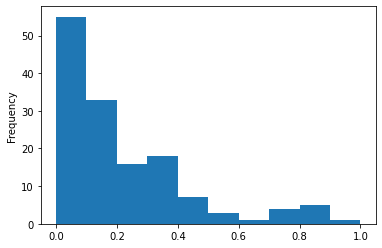

In [231]:
df_train.price.plot(kind='hist')

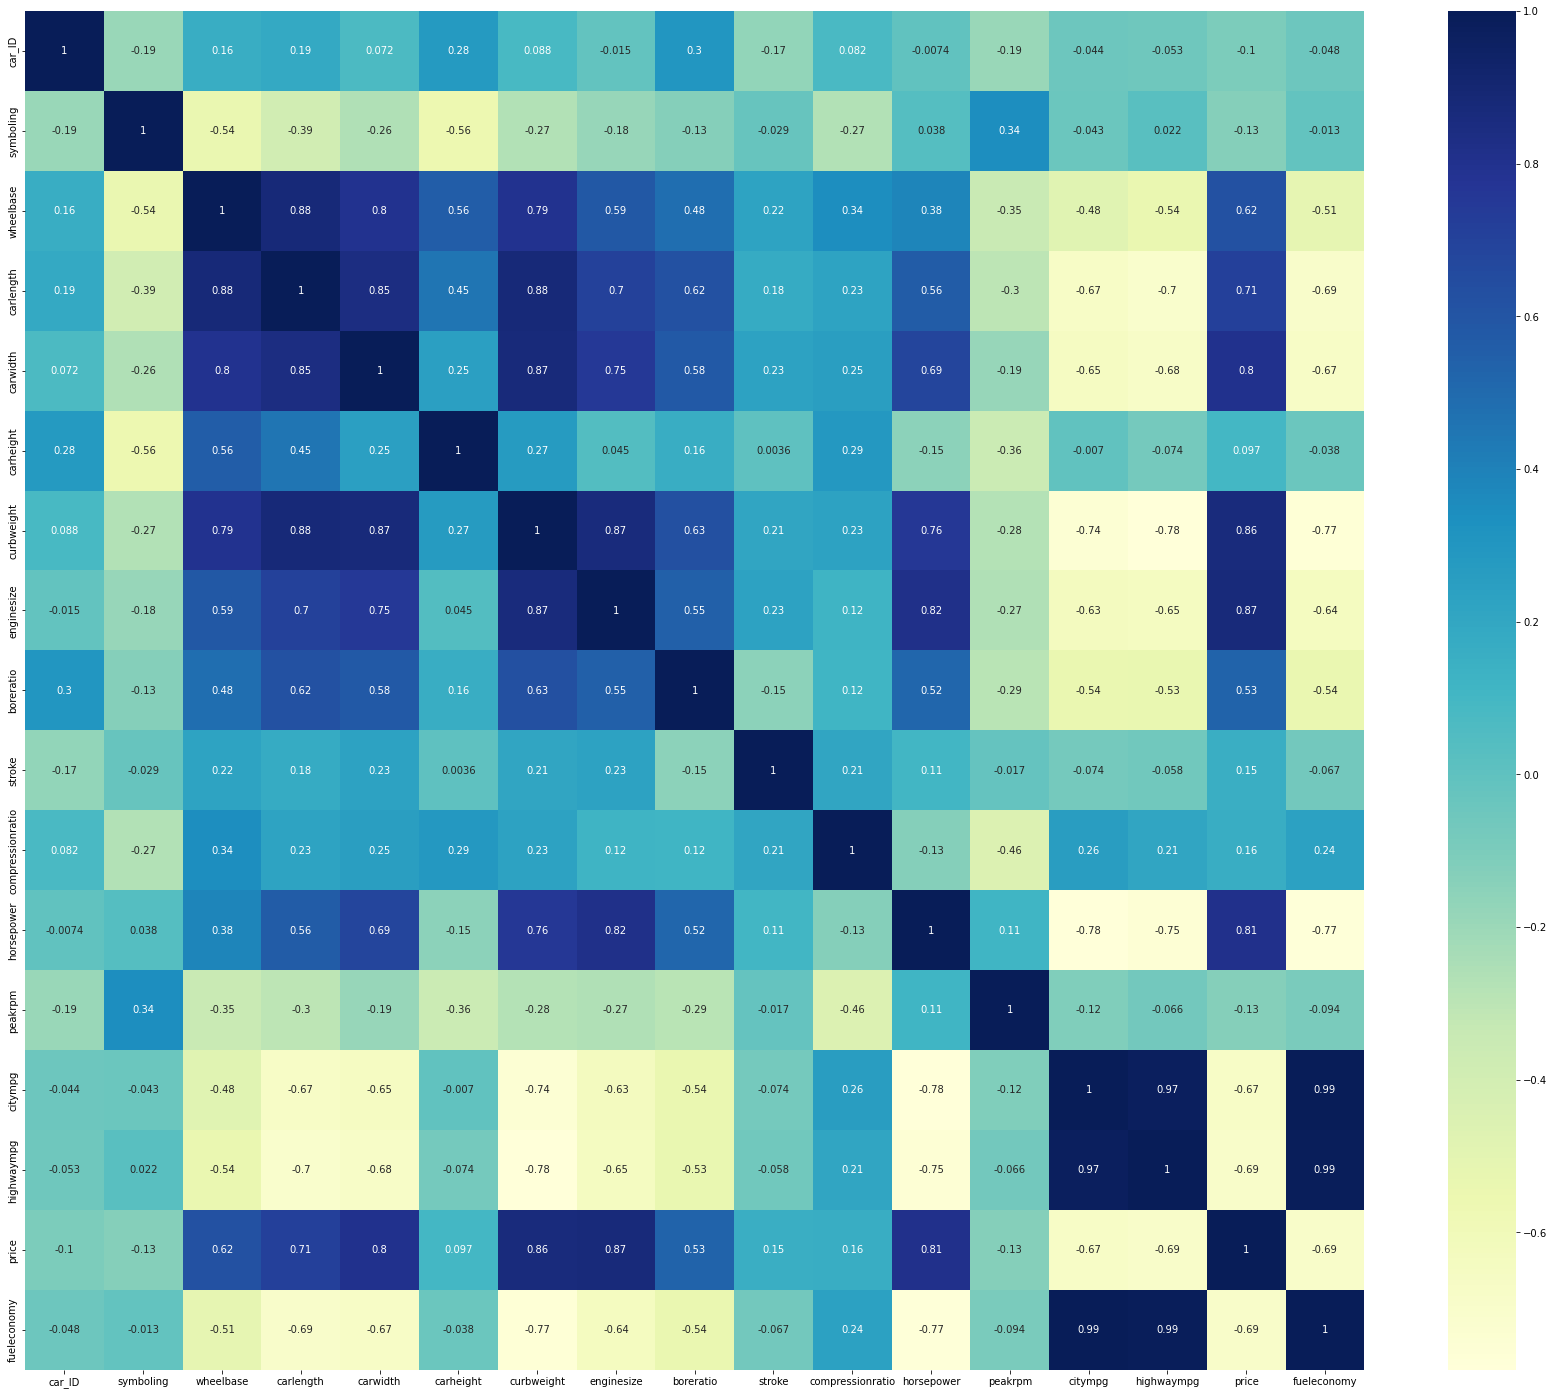

In [232]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [130]:
# df_train.pop('price') #| y = df_train.price, X = df_train[[c for c in cont_cols if 'price' not in c]

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'carsrange'],
      dtype='object')

In [148]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train[[c for c in cont_cols if 'price' not in c]]
# y_train

In [142]:
# min(y_train)
# X_train.dtypes.value_counts()
# X = df_train[[c for c in cont_cols if 'price' not in c]]
# [c for c in cont_cols if 'price' not in c]

float64     8
object      6
category    1
dtype: int64

In [247]:
X_train = df_train[[i for i in num_vars if not 'price' in i]]
# 'price' in X_train.columns

In [143]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
lm = LinearRegression() #instantiation of linear model

lm.fit(X_train,y_train) #training on your train dataset

rfe = RFE(lm) # recursive feature elimination returns the most relevant features that influenced the prediction

rfe = rfe.fit(X_train, y_train)

In [173]:
# dir(rfe)
# rfe.score(X_train, y_train)
# a = ['a','b','c']
# b = [1,2,3]
# dict(zip(a,b))
# y = WX + c | y-target_var, W = weight/coefficients, c - intercepts
# print(lm.coef_,lm.intercept_)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('horsepower', True, 1),
 ('fueleconomy', False, 5),
 ('carlength', False, 2),
 ('carwidth', True, 1)]

In [176]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth'], dtype='object')

In [177]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth
122,0.272692,0.139623,0.083333,0.291667
125,0.500388,0.339623,0.395833,0.666667
166,0.314973,0.139623,0.266667,0.308333
1,0.411171,0.260377,0.262500,0.316667
199,0.647401,0.260377,0.475000,0.575000


In [178]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant/independent variables/features
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [179]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           1.91e-51
Time:                        13:37:55   Log-Likelihood:                 142.17
No. Observations:                 143   AIC:                            -274.3
Df Residuals:                     138   BIC:                            -259.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.502      0.0

In [180]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,7.66
1,curbweight,7.28
2,enginesize,5.26
4,carwidth,4.26
3,horsepower,3.14


In [181]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.0
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.63e-51
Time:                        13:45:04   Log-Likelihood:                 138.98
No. Observations:                 143   AIC:                            -270.0
Df Residuals:                     139   BIC:                            -258.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1631      0.021     -7.619      0.0

In [182]:
checkVIF(X_train_new)

,Features,VIF
0,const,7.59
1,enginesize,3.85
2,horsepower,3.12
3,carwidth,2.40


### Residual Analysis of Model

In [183]:
lm = sm.OLS(y_train,X_train_new).fit()

y_train_price = lm.predict(X_train_new)

C:\Users\ng005454\OneDrive\Project\STUTERN\SGA11_DSCI\02112021\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

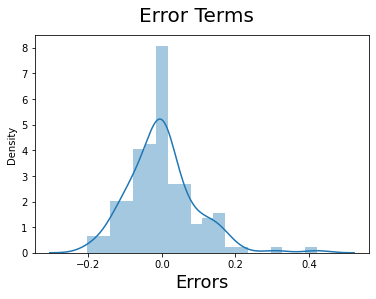

In [184]:
# Plot the histogram of the error terms

fig = plt.figure()

sns.distplot((y_train - y_train_price), bins = 20)

fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Evaluation and Preediction

In [185]:
df_test.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
160,7738,gas,std,sedan,fwd,95.7,2094,ohc,four,98,3.19,70,42.05,166.3,64.4,Budget
186,8495,gas,std,sedan,fwd,97.3,2275,ohc,four,109,3.19,85,30.15,171.7,65.5,Medium
59,8845,gas,std,hatchback,fwd,98.8,2385,ohc,four,122,3.39,84,28.70,177.8,66.5,Medium
165,9298,gas,std,sedan,rwd,94.5,2265,dohc,four,98,3.24,112,27.35,168.7,64.0,Budget
140,7603,gas,std,hatchback,4wd,93.3,2240,ohcf,four,108,3.62,73,28.25,157.3,63.8,Budget


In [186]:
df_test[cont_cols] = scaler.fit_transform(df_test[cont_cols])

df_test.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
160,0.058474,gas,std,sedan,fwd,0.265306,0.132148,ohc,four,0.082969,0.515873,0.116129,1.000000,0.341732,0.200000,Budget
186,0.077398,gas,std,sedan,fwd,0.311953,0.219125,ohc,four,0.131004,0.515873,0.212903,0.561694,0.426772,0.315789,Medium
59,0.086148,gas,std,hatchback,fwd,0.355685,0.271985,ohc,four,0.187773,0.674603,0.206452,0.508287,0.522835,0.421053,Medium
165,0.097473,gas,std,sedan,rwd,0.230321,0.214320,dohc,four,0.082969,0.555556,0.387097,0.458564,0.379528,0.157895,Budget
140,0.055099,gas,std,hatchback,4wd,0.195335,0.202307,ohcf,four,0.126638,0.857143,0.135484,0.491713,0.200000,0.136842,Budget


In [187]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [188]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [189]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [190]:
y_pred

160   -0.005796
186    0.094100
59     0.164929
165    0.060648
140    0.005584
         ...   
28     0.102738
29     0.369501
182   -0.002866
40    -0.011602
128    0.546590
Length: 62, dtype: float64

#### Evaluation of test via comparison of y_pred and y_test

In [191]:
from sklearn.metrics import r2_score 

r2_score(y_test, y_pred)

0.7586169915911105

Text(0, 0.5, 'y_pred')

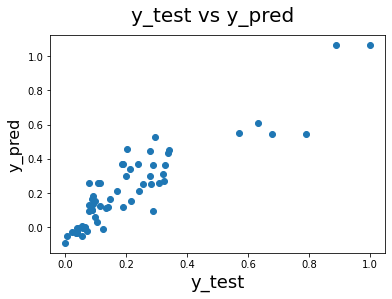

In [192]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [194]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.0
Date:                Fri, 19 Nov 2021   Prob (F-statistic):           2.63e-51
Time:                        14:11:41   Log-Likelihood:                 138.98
No. Observations:                 143   AIC:                            -270.0
Df Residuals:                     139   BIC:                            -258.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1631      0.021     -7.619      0.0